In [1]:
import os
import tempfile

# EOReader
from eoreader.reader import Reader
from eoreader.bands import GREEN, NDVI, CLOUDS

In [2]:
path = os.path.join("/home", "data", "DATA", "PRODS", "S2", "PB 02.07+", "S2B_MSIL2A_20200114T065229_N0213_R020_T40REQ_20200114T094749.SAFE")

In [3]:
reader = Reader()

In [4]:
prod = reader.open(path)
prod

eoreader.S2Product 'S2B_MSIL2A_20200114T065229_N0213_R020_T40REQ_20200114T094749'
Attributes:
	condensed_name: 20200114T065229_S2_T40REQ_L2A_094749
	path: /home/data/DATA/PRODS/S2/PB 02.07+/S2B_MSIL2A_20200114T065229_N0213_R020_T40REQ_20200114T094749.SAFE
	constellation: Sentinel-2
	sensor type: Optical
	product type: MSIL2A
	default pixel size: 10.0
	default resolution: 10.0
	acquisition datetime: 2020-01-14T06:52:29
	band mapping:
		COASTAL_AEROSOL: 01
		BLUE: 02
		GREEN: 03
		RED: 04
		VEGETATION_RED_EDGE_1: 05
		VEGETATION_RED_EDGE_2: 06
		VEGETATION_RED_EDGE_3: 07
		NIR: 08
		NARROW_NIR: 8A
		WATER_VAPOUR: 09
		SWIR_1: 11
		SWIR_2: 12
	needs extraction: False
	cloud cover: 63.86422
	tile name: T40REQ

In [5]:
tmp_folder = tempfile.TemporaryDirectory()
prod.output = os.path.join(tmp_folder.name, prod.condensed_name)

In [6]:
# Load those bands as a xarray.Dataset
band_ds = prod.load([GREEN, NDVI, CLOUDS])
band_ds

<xarray.Dataset>
Dimensions:                  (band: 1, x: 10980, y: 10980)
Coordinates:
  * band                     (band) int64 1
    spatial_ref              int64 0
  * x                        (x) float64 5e+05 5e+05 ... 6.098e+05 6.098e+05
  * y                        (y) float64 3e+06 3e+06 3e+06 ... 2.89e+06 2.89e+06
Data variables:
    SpectralBandNames.GREEN  (band, y, x) float32 0.1034 0.1134 ... nan nan
    NDVI                     (band, y, x) float32 0.2816 0.2359 ... nan nan
    CloudsBandNames.CLOUDS   (band, y, x) float32 0.0 0.0 0.0 ... nan nan nan
Attributes:
    long_name:         GREEN NDVI CLOUDS
    constellation:     Sentinel-2
    constellation_id:  S2
    product_path:      /home/data/DATA/PRODS/S2/PB 02.07+/S2B_MSIL2A_20200114...
    product_name:      S2B_MSIL2A_20200114T065229_N0213_R020_T40REQ_20200114T...
    product_filename:  S2B_MSIL2A_20200114T065229_N0213_R020_T40REQ_20200114T...
    instrument:        MSI
    product_type:      MSIL2A
    acquisition_date:  20200114T065229
    condensed_name:    20200114T065229_S2_T40REQ_L2A_094749
    orbit_direction:   DESCENDING
    cloud_cover:       63.86422

In [7]:
# Load individual bands (as xarray.DataArray)
green = band_ds[GREEN]
ndvi = band_ds[NDVI]
clouds = band_ds[CLOUDS]

green

<xarray.DataArray <SpectralBandNames.GREEN: 'GREEN'> (band: 1, y: 10980,
                                                      x: 10980)>
array([[[0.1034, 0.1134, 0.1064, ...,    nan,    nan,    nan],
        [0.0969, 0.0895, 0.1094, ...,    nan,    nan,    nan],
        [0.1132, 0.0959, 0.1082, ...,    nan,    nan,    nan],
        ...,
        [1.488 , 1.4416, 1.3888, ...,    nan,    nan,    nan],
        [1.468 , 1.4472, 1.4072, ...,    nan,    nan,    nan],
        [1.4168, 1.4072, 1.4   , ...,    nan,    nan,    nan]]],
      dtype=float32)
Coordinates:
  * band         (band) int64 1
    spatial_ref  int64 0
  * x            (x) float64 5e+05 5e+05 5e+05 ... 6.098e+05 6.098e+05 6.098e+05
  * y            (y) float64 3e+06 3e+06 3e+06 ... 2.89e+06 2.89e+06 2.89e+06
Attributes: (12/13)
    long_name:         GREEN
    constellation:     Sentinel-2
    constellation_id:  S2
    product_path:      /home/data/DATA/PRODS/S2/PB 02.07+/S2B_MSIL2A_20200114...
    product_name:      S2B_MSIL2A_20200114T065229_N0213_R020_T40REQ_20200114T...
    product_filename:  S2B_MSIL2A_20200114T065229_N0213_R020_T40REQ_20200114T...
    ...                ...
    product_type:      MSIL2A
    acquisition_date:  20200114T065229
    condensed_name:    20200114T065229_S2_T40REQ_L2A_094749
    orbit_direction:   DESCENDING
    radiometry:        reflectance
    cloud_cover:       63.86422

In [8]:
# Let's see what's inside your output folder
[f.relative_to(prod.output) for f in prod.output.glob("**/*.tif")]

[PosixPath('tmp_20200114T065229_S2_T40REQ_L2A_094749/20200114T065229_S2_T40REQ_L2A_094749_RED_10-00m_nodata.tif'),
 PosixPath('tmp_20200114T065229_S2_T40REQ_L2A_094749/20200114T065229_S2_T40REQ_L2A_094749_NIR_10-00m_nodata.tif'),
 PosixPath('tmp_20200114T065229_S2_T40REQ_L2A_094749/20200114T065229_S2_T40REQ_L2A_094749_NDVI_10-00m.tif'),
 PosixPath('tmp_20200114T065229_S2_T40REQ_L2A_094749/20200114T065229_S2_T40REQ_L2A_094749_GREEN_10-00m_nodata.tif'),
 PosixPath('tmp_20200114T065229_S2_T40REQ_L2A_094749/20200114T065229_S2_T40REQ_L2A_094749_CLOUDS_10-00m.tif')]

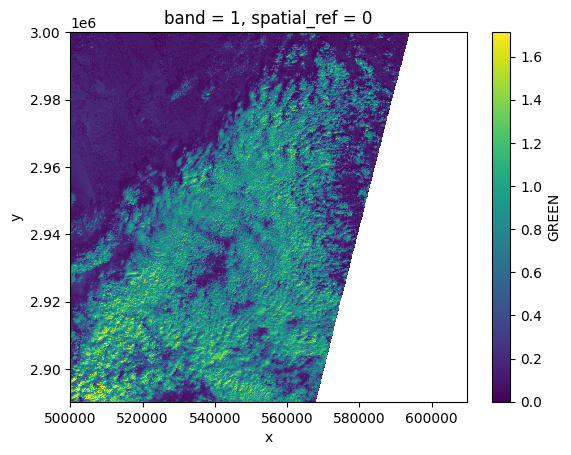

In [9]:
# Plot a subsampled version
green[:, ::10, ::10].plot()

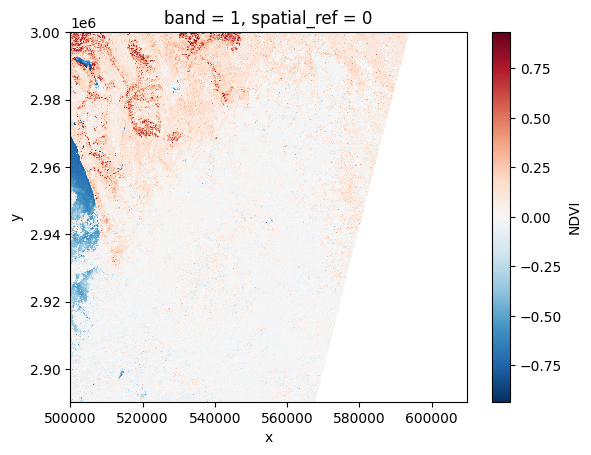

In [10]:
# Plot a subsampled version
ndvi[:, ::10, ::10].plot()

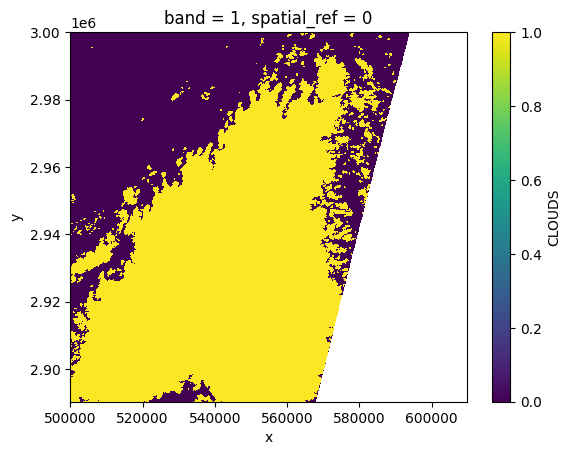

In [11]:
# Plot a subsampled version
clouds[:, ::10, ::10].plot()

In [12]:
# Remove the output (it would have been best to call the temporary directory in a context manager)
tmp_folder.cleanup()